In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean

In [2]:
df = pd.read_csv('age-height.csv')
df_logistic = df[['height', 'sex']]

In [3]:
df_logistic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59822 entries, 0 to 59821
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  59822 non-null  float64
 1   sex     59822 non-null  object 
dtypes: float64(1), object(1)
memory usage: 934.8+ KB


In [4]:
X = np.array(df_logistic['height']).reshape(-1,1)
y = df_logistic['sex']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
logistic_model = LogisticRegression(solver='liblinear')
cv_results = cross_validate(logistic_model, X_train, y_train, cv=3)
cv_results

{'fit_time': array([0.03300714, 0.0330081 , 0.03100705]),
 'score_time': array([0.0140028 , 0.01400304, 0.01400304]),
 'test_score': array([0.83438852, 0.82760782, 0.8282347 ])}

In [16]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[pow(10,i) for i in range(0, 10)],'penalty':['l1','l2']}
clf = GridSearchCV(LogisticRegression(solver='liblinear'), parameters,cv=3)
clf.fit(X_train,y_train)
clf.cv_results_

E:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\s

{'mean_fit_time': array([0.09435463, 0.03167359, 0.09468802, 0.03134004, 0.0916872 ,
        0.03167391, 0.09302092, 0.03267384, 0.09502133, 0.03200714,
        0.09168704, 0.03167383, 0.09102066, 0.03134028, 0.09168712,
        0.03234061, 0.09402124, 0.03234037, 0.09303538, 0.03434118]),
 'std_fit_time': array([0.00170006, 0.00047148, 0.00309194, 0.00047143, 0.00094325,
        0.00047154, 0.00216027, 0.00047171, 0.00355988, 0.00081653,
        0.00124785, 0.00047165, 0.00141467, 0.0004716 , 0.00170052,
        0.00047182, 0.00141484, 0.00047165, 0.00081679, 0.00262562]),
 'mean_score_time': array([0.01333642, 0.01366981, 0.01366981, 0.01366989, 0.0133361 ,
        0.01366973, 0.01333626, 0.01366981, 0.01400304, 0.01333626,
        0.01333666, 0.0133361 , 0.01366981, 0.01366997, 0.01366973,
        0.01433651, 0.01366965, 0.01366973, 0.01398873, 0.01400328]),
 'std_score_time': array([4.71370354e-04, 4.71595177e-04, 4.71426560e-04, 4.71651343e-04,
        4.71595177e-04, 4.71707529e-

In [8]:
clf.score(X_test, y_test)

0.8342666109486001

Text(0, 0.5, 'Probability of being a male')

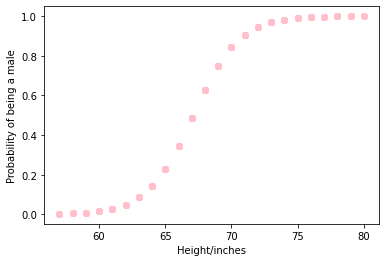

In [34]:
logistic_model.fit(X_train, y_train)
y_pred_proba = logistic_model.predict_proba(X_test)[:,1]
plt.scatter(X_test, y_pred_proba, color='pink')
plt.xlabel('Height/inches')
plt.ylabel('Probability of being a male')